Datasets:

- [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/code)
- [International Country Codes](https://www.worlddata.info/countrycodes.php)
- [Country and Continent Codes List](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list)

## 1. Download the Dataset

Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to draw pictures in jupyter notebook
%matplotlib inline

sns.set(style="whitegrid")

Upload the dataset

In [2]:
athletes_df = pd.read_csv("../datasets/athlete_events.csv")
countries_df = pd.read_csv("../datasets/noc_regions.csv")

## 2. Data Preparation

In [3]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Start with athletes_df

Basic info of pd.DataFrame

In [4]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Checking for any missing values

In [5]:
athletes_df.isna().mean()

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

Checking for the total number of rows & columns

In [6]:
athletes_df.shape

(271116, 15)

`Name` column contains duplicate entires. I am going to count the number of athletes in the dataframe

In [7]:
athletes_df["Name"].nunique()

134732

Kind of sports are represented in the dataframe

In [8]:
athletes_df["Sport"].nunique()

66

Check for the duplicated rows and drop them

In [9]:
athletes_df.duplicated().sum()

1385

In [10]:
athletes_df.drop_duplicates(['ID', 'Name', 'Games', 'Sport', 'Event', 'Medal'], inplace=True)

In [11]:
athletes_df.shape

(269718, 15)

In [12]:
athletes_df.duplicated().sum()

0

We will work with the Winter Olympic Games. Let's choose "Winter" in the `Season`column

In [13]:
athletes_df = athletes_df[athletes_df["Season"] == "Winter"]

We can now make some conclusions regarding this dataframe
- It contains 271116 rows and 15 columns.
- There are 134732 athletes
- It contains 1385 duplicated values
- There are 66 kind of sports

I've created a new dataframe only with the Winter Olympic Games and without duplicates

### Take a look on NOC regions dataset

In [14]:
countries_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [15]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


### Let's merge two DataFrames by `NOC` column

In [16]:
merged_df = athletes_df.merge(countries_df, on="NOC", how="left")
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Datasets with continents, countries and theid codes

The dataset with country codes is paid for. That's why I have successfully scraped and saved it as `Country Codes.csv`

In [17]:
x = pd.read_html("https://www.worlddata.info/countrycodes.php")[0]

In [18]:
x.to_csv("../datasets/Country Codes.csv", index=False, encoding="utf-8")

In [19]:
del x

Read them

In [20]:
iso_to_noc = pd.read_csv("../datasets/Country Codes.csv")
continents_df = pd.read_csv("../datasets/country-and-continent-codes-list-csv_csv.csv")

In [21]:
iso_to_noc.head()

,Country,ISO 3166-1 alpha2,ISO 3166-1 alpha3,ISO 3166-1 numeric,IOC,Fips 10,License Plate,Domain
0,Afghanistan,AF,AFG,4,AFG,AF,AFG,.af
1,Åland Islands,AX,ALA,248,NaN,NaN,AX,.ax
2,Albania,AL,ALB,8,ALB,AL,AL,.al
3,Algeria,DZ,DZA,12,ALG,AG,DZ,.dz
4,American Samoa,AS,ASM,16,ASA,AQ,USA,.as


In [22]:
continents_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


According to the `iso_to_noc` dataframe and for convenient work, I am going to rename some columns in the dataframes

In [23]:
continents_df.rename(columns={"Two_Letter_Country_Code": "alpha 2",
                             "Three_Letter_Country_Code": "alpha 3"},
                    inplace=True)

iso_to_noc.rename(columns={"ISO 3166-1 alpha2": "alpha 2",
                           "ISO 3166-1 alpha3": "alpha 3",
                           "ISO 3166-1 numeric": "numeric"},
                 inplace=True)

Using the `alpha 3` parameter, merge these dataframes

In [24]:
country_codes_df = iso_to_noc.merge(continents_df, on="alpha 3", how="left")
country_codes_df.head()

,Country,alpha 2_x,alpha 3,numeric,IOC,Fips 10,License Plate,Domain,Continent_Name,Continent_Code,Country_Name,alpha 2_y,Country_Number
0,Afghanistan,AF,AFG,4,AFG,AF,AFG,.af,Asia,AS,"Afghanistan, Islamic Republic of",AF,4.0
1,Åland Islands,AX,ALA,248,NaN,NaN,AX,.ax,Europe,EU,Åland Islands,AX,248.0
2,Albania,AL,ALB,8,ALB,AL,AL,.al,Europe,EU,"Albania, Republic of",AL,8.0
3,Algeria,DZ,DZA,12,ALG,AG,DZ,.dz,Africa,AF,"Algeria, People's Democratic Republic of",DZ,12.0
4,American Samoa,AS,ASM,16,ASA,AQ,USA,.as,Oceania,OC,American Samoa,AS,16.0


In [25]:
country_codes_df.rename(columns={"IOC": "NOC"}, inplace=True)

### Final dataframe

Just merge `countries_df` and `country_codes_df`, using `NOC` parameter

In [26]:
df = merged_df.merge(country_codes_df[["NOC", "alpha 3", "Continent_Name"]], on="NOC", how="left")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,alpha 3,Continent_Name
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,NLD,Europe
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,NLD,Europe
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe


In [27]:
df.isna().sum()

ID                    0
Name                  0
Sex                   0
Age                 289
Height             8465
Weight             9201
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal             45089
region                0
notes             50413
alpha 3            4265
Continent_Name     4265
dtype: int64

## 3. Exploratory Data Analysis (EDA) and Vizualization

How many countries participated in the Winter Olympic Games

In [28]:
print(f"There have been {df['region'].nunique()} nations that have ever competed in the Winter Olympics")

There have been 111 nations that have ever competed in the Winter Olympics


The top 10 nations with the maximum number of athletes

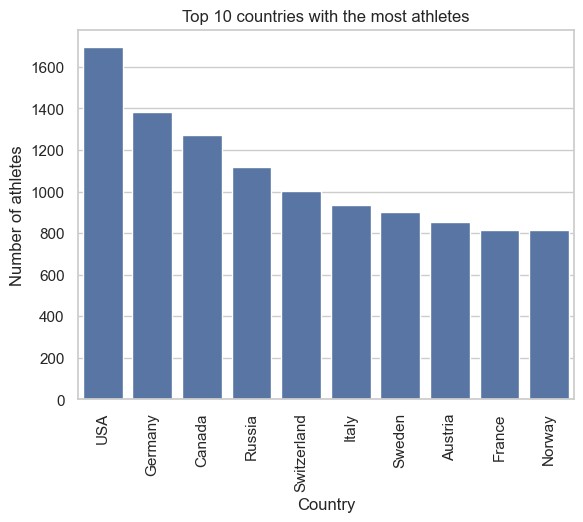

In [29]:
athletes_each_country = df.drop_duplicates(["Name"]).groupby(["region"])["Name"].count()
athletes_each_country = athletes_each_country.sort_values(ascending=False)

sns.barplot(athletes_each_country.head(10))
plt.title("Top 10 countries with the most athletes")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of athletes")
plt.show()

The bar chart shows that, at about 1 700, the majority of athletes were from the United States, with the remaining athletes coming from Canada and European nations.

Let’s take a look at the same number of each continent

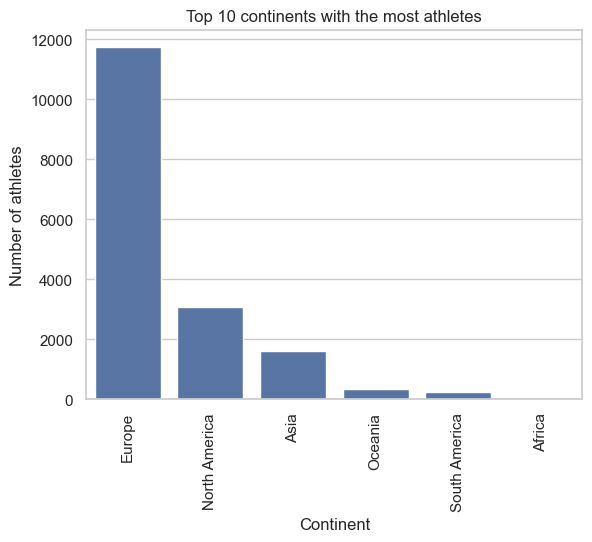

In [30]:
athletes_each_continent = df.drop_duplicates(["Name"]).groupby(["Continent_Name"])["Name"].count()
athletes_each_continent = athletes_each_continent.sort_values(ascending=False)

sns.barplot(athletes_each_continent)
plt.title("Top 10 continents with the most athletes")
plt.xticks(rotation=90)
plt.xlabel("Continent")
plt.ylabel("Number of athletes")
plt.show()

8 of 10 nations in the previous graphic, ranked by the amount of athletes, from Europe. Consequently, the European continent is clearly popular in this histogram (3 times more athletes compared to second place)

Now, let’s compare the number of medals of each country. Let's consider only the top 10 countries by number of all medals

In [31]:
medals_df = pd.crosstab(df["region"], df["Medal"])

# Reorder columns
medals_df = medals_df[['Gold', 'Silver', 'Bronze']]

In [32]:
medals_df_1 = medals_df.copy()
medals_df_1["All"] = medals_df.sum(axis=1)
medals_df_1 = medals_df_1.sort_values(by="All", ascending=False)

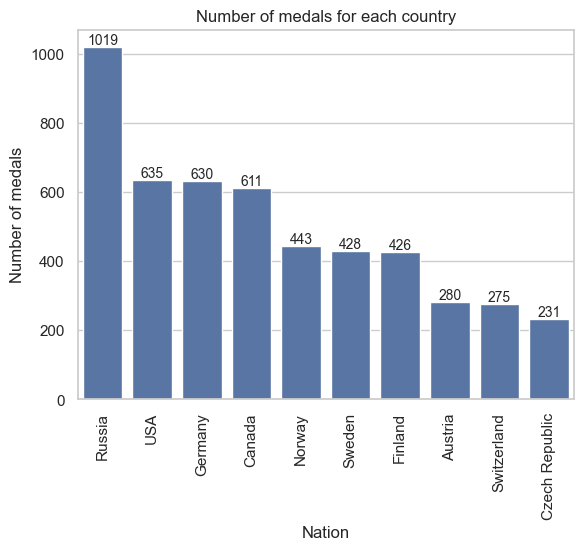

In [33]:
ax = sns.barplot(data=medals_df_1.head(10), x='region', y='All')
ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Number of medals for each country')
plt.xlabel('Nation')
plt.ylabel('Number of medals')
plt.xticks(rotation=90)

plt.show()

As we can see, Russia leads the field in terms of total medals won in the Winter Olympic Games' entire history. The USA, Germany, and Canada national teams, in that order, still hold the first four places (about 600 medals). Scandinavian countries Norway, Sweden, Finland hold 5-7 places with average 
Once again, European nations have leadership.

Let's look at the top 10 nations by types of medals. Sorted by gold

In [34]:
medals_df_2 = medals_df.copy()
medals_df_2 = medals_df_2.sort_values(by="Gold", ascending=False)

In [35]:
medals_df_melted = medals_df_2.head(10).reset_index().melt(id_vars="region")

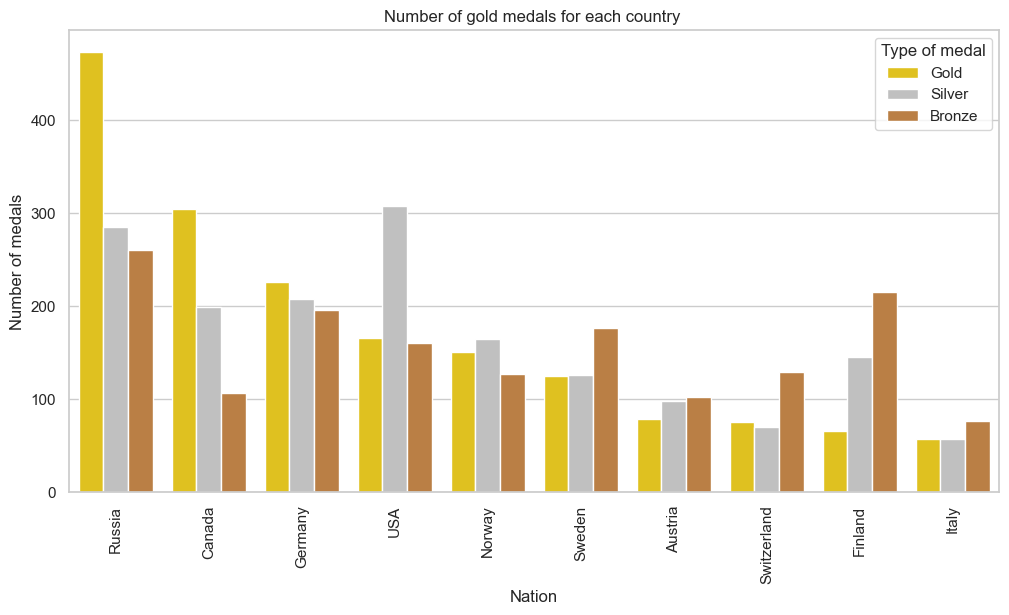

In [36]:
plt.figure(figsize=(12, 6))

sns.barplot(data=medals_df_melted, x='region', y='value', hue='Medal', palette=['#FFD700', '#C0C0C0', '#CD7F32'])

plt.title('Number of gold medals for each country ')
plt.xlabel('Nation')
plt.ylabel('Number of medals')
plt.legend(title='Type of medal')
plt.xticks(rotation=90)

plt.show()

Russia is also a clear leader here

In [37]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,alpha 3,Continent_Name
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,NLD,Europe
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,NLD,Europe
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NLD,Europe


Let’s start with the trends of the number of athletes participated in Olympics

In [38]:
athletes_by_year = df.drop_duplicates(["Name", "Year"])
athletes_by_year_grouped = athletes_by_year.groupby("Year")["Name"].count()

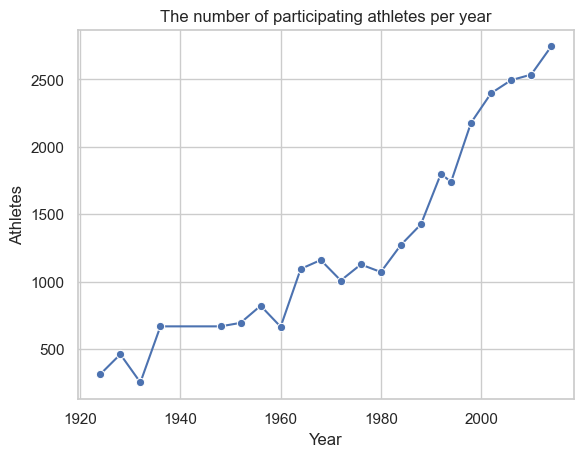

In [39]:
sns.lineplot(data=athletes_by_year_grouped, marker="o")
plt.title('The number of participating athletes per year')
plt.xlabel('Year')
plt.ylabel('Athletes')

plt.show()

Next, look at the number of countries participated over years

In [40]:
countries_by_year = df.drop_duplicates(["region", "Year"])
countries_by_year_grouped = countries_by_year.groupby("Year")["region"].count()

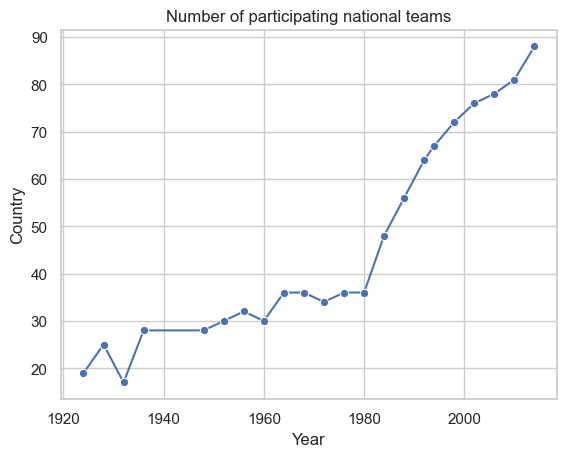

In [41]:
sns.lineplot(data=countries_by_year_grouped, marker="o")
plt.title('Number of participating national teams')
plt.xlabel('Year')
plt.ylabel('Country')

plt.show()

In [42]:
# ToDo: Result of individual athletes